# Preparing Data for Clustering

In this notebook, we are going to prepare our data for clustering analysis.

### Installation of Dependencies

Before we proceed, let's ensure that we have all the necessary Python packages installed. These packages provide tools for data manipulation, analysis, and visualization.




## Importing Libraries

In this cell, we import essential Python libraries needed throughout the notebook. These libraries include:
- `pandas` for data manipulation and analysis.
- `numpy` for numerical operations.
- `StandardScaler` from `sklearn.preprocessing` for feature scaling.
- `PCA` from `sklearn.decomposition` for dimensionality reduction.
- `matplotlib.pyplot` for data visualization.
- `KMeans` from `sklearn.cluster` for applying the KMeans clustering algorithm.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import joblib

## Data Loading

Here, we load our dataset from a CSV file into a pandas DataFrame. This step is crucial for the subsequent data cleaning, exploration, and analysis phases. The `Path` library is used to handle file paths.

In [3]:
file_path = Path(r'..\data\03_processed\01_ready_data.csv')
df = pd.read_csv(file_path)

## Data Cleaning

In this cell, we remove columns that are not relevant to our clustering analysis. This includes personal information or identifiers that do not contribute to the clustering process. The goal is to retain only the features that are useful for identifying clusters.

In [4]:
cols_for_grouping = df.loc[:, ~df.columns.isin(['Nazwa', 'ID', 'Adres e-mail'])].columns

In [5]:
df[cols_for_grouping] = StandardScaler().fit_transform(df[cols_for_grouping])

#Columns for model
data_for_model = df.loc[:, ~df.columns.isin(['Nazwa', 'ID', 'Adres e-mail', 'W jaki sposób chcesz uczestniczyć w Community?'])]


## Elbow Plot for PCA Analysis

This cell generates an elbow plot to visualize the explained variance by the principal components in a PCA analysis. The plot helps in determining the optimal number of principal components to retain. It displays two lines:
- The first line (dashed) shows the individual explained variance of each principal component.
- The second line shows the cumulative explained variance as we increase the number of components.

The 'elbow' in the plot is a good indicator of the point beyond which adding more principal components does not significantly increase the explained variance, thus guiding the selection of an appropriate number of components for further analysis.

Explained Variance Ratio: [0.33528362 0.14080496 0.07750359 0.06245648 0.05576592 0.0367601
 0.03405614 0.03167675 0.02327877 0.02270576 0.01831696 0.01694553
 0.01544642 0.01453608 0.01379296 0.01344773 0.01073192 0.00897822
 0.00881382 0.00761885 0.00724234 0.00666618 0.00577641 0.00532805
 0.00482904 0.00454902 0.00334944 0.003043   0.00241412 0.00221825
 0.00193868 0.00123645 0.00118325 0.00075023 0.00055498]
Cumulative Explained Variance: [0.33528362 0.47608858 0.55359217 0.61604864 0.67181456 0.70857466
 0.7426308  0.77430755 0.79758632 0.82029208 0.83860904 0.85555457
 0.87100098 0.88553706 0.89933002 0.91277775 0.92350967 0.9324879
 0.94130172 0.94892057 0.95616291 0.96282909 0.96860549 0.97393354
 0.97876258 0.9833116  0.98666104 0.98970404 0.99211817 0.99433641
 0.99627509 0.99751154 0.99869479 0.99944502 1.        ]


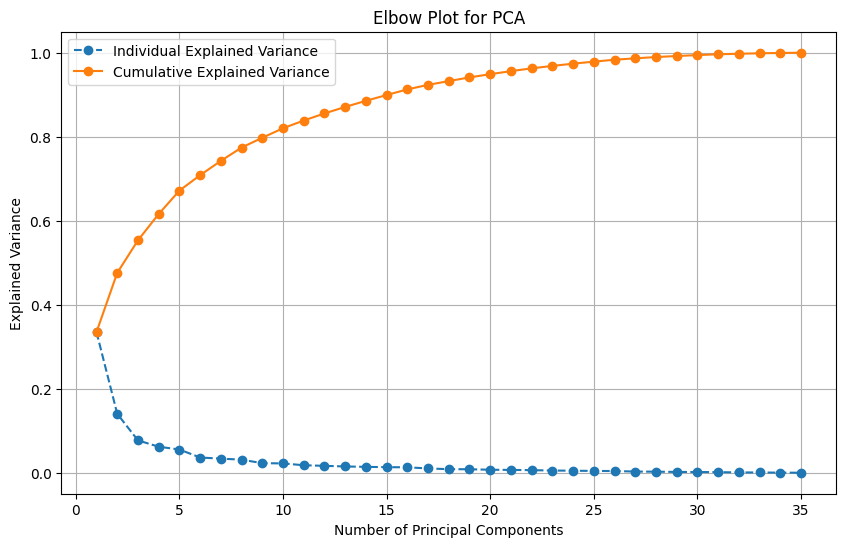

In [7]:
pca_ = PCA()
pca_.fit(data_for_model)

# Explained variance ratio
explained_variance = pca_.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)



plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#
pca = PCA(n_components=21)
pca.fit(data_for_model)
data_pca = pca.transform(data_for_model)

In [9]:
data_pca = pd.DataFrame(data_pca, columns=[f'PC{i}' for i in range(1, 22)])

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(data_pca)

data_pca['Cluster'] = kmeans_labels

data_pca.head(10)

data_pca.to_csv('data_pca_21_comp.csv', index=False)


In [13]:
joblib.dump(pca, 'pca_21.joblib')

['pca_21.joblib']